## Preprocessing - załadowanie danych, przygotowanie danych, analiza rozkładu zmiennych, standardyzacja, ekstrakcja cech

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/data.csv')
df = df.drop(['Mild', 'Mod', 'Sev'], axis=1)
df

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,mild,65,"21,09375",10,"1,9",3,2,1,1,0,0,0
1,severe,68,"20,41522491",13,"1,8",12,6,0,0,0,0,0
2,mild,68,"20,41522491",13,"1,5",12,3,0,1,0,0,0
3,mild,63,"28,5075216",13,"2,9",1,4,1,1,0,0,0
4,mild,87,"22,93975069",12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,mild,60,"22,18934911",11,"1,8",2,3,1,1,0,0,0
1033,severe,49,"24,19649379",16,"3,1",8,5,1,0,0,1,1
1034,mild,41,"23,80869017",12,"1,7",4,4,0,0,0,0,0
1035,mild,67,"26,98600101",11,"3,9",8,3,1,1,0,0,0


In [3]:
col_names = []
for col in df.columns:
    col_names.append(col)
    
col_mapper = {i: f'{col_names[i]}' for i in range(0, 12)}
col_mapper

{0: 'Severity',
 1: 'Age',
 2: 'BMI',
 3: 'CSA',
 4: 'PB',
 5: 'Duration',
 6: 'NRS',
 7: 'Sex',
 8: 'Side',
 9: 'Diabetes',
 10: 'NP',
 11: 'Weakness'}

Należy przemapować kolumny Severity	Mild Mod Sev do wartości typu integer aby można było prawidłowo przeprowadzić standardyzację i dalsze operacje uczenia.

In [4]:
print(df['Severity'].unique())

['mild' 'severe' 'moderate']


In [5]:
# Severenity: mild - 0, moderate - 1, severe - 1
# Mild: mild - 0, others - 1
# Mod: moderate - 0, others - 1
# Sev: severe - 0, others - 1

df_adjusted = df

df_adjusted["Severity"].replace({"mild": 0, "moderate": 1, "severe": 2}, inplace=True)
# df_adjusted["Mild"].replace({"mild": 0, "others": 1}, inplace=True)
# df_adjusted["Mod"].replace({"moderate": 0, "others": 1}, inplace=True)
# df_adjusted["Sev"].replace({"severe": 0, "others": 1}, inplace=True)

df_adjusted
        


,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,"21,09375",10,"1,9",3,2,1,1,0,0,0
1,2,68,"20,41522491",13,"1,8",12,6,0,0,0,0,0
2,0,68,"20,41522491",13,"1,5",12,3,0,1,0,0,0
3,0,63,"28,5075216",13,"2,9",1,4,1,1,0,0,0
4,0,87,"22,93975069",12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,"22,18934911",11,"1,8",2,3,1,1,0,0,0
1033,2,49,"24,19649379",16,"3,1",8,5,1,0,0,1,1
1034,0,41,"23,80869017",12,"1,7",4,4,0,0,0,0,0
1035,0,67,"26,98600101",11,"3,9",8,3,1,1,0,0,0


In [6]:
for i in range (1037):
    df_adjusted['BMI'][i] = df_adjusted['BMI'][i].replace(',', '.')
    df_adjusted['CSA'][i] = df_adjusted['CSA'][i].replace(',', '.')
    df_adjusted['PB'][i] = df_adjusted['PB'][i].replace(',', '.')

df_adjusted

C:\Users\Dodo\AppData\Local\Temp/ipykernel_5996/1510437294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['BMI'][i] = df_adjusted['BMI'][i].replace(',', '.')
C:\Users\Dodo\AppData\Local\Temp/ipykernel_5996/1510437294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['CSA'][i] = df_adjusted['CSA'][i].replace(',', '.')
C:\Users\Dodo\AppData\Local\Temp/ipykernel_5996/1510437294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,21.09375,10,1.9,3,2,1,1,0,0,0
1,2,68,20.41522491,13,1.8,12,6,0,0,0,0,0
2,0,68,20.41522491,13,1.5,12,3,0,1,0,0,0
3,0,63,28.5075216,13,2.9,1,4,1,1,0,0,0
4,0,87,22.93975069,12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,22.18934911,11,1.8,2,3,1,1,0,0,0
1033,2,49,24.19649379,16,3.1,8,5,1,0,0,1,1
1034,0,41,23.80869017,12,1.7,4,4,0,0,0,0,0
1035,0,67,26.98600101,11,3.9,8,3,1,1,0,0,0


In [7]:
df_adjusted['BMI'] = df_adjusted['BMI'].astype(float)
df_adjusted['CSA'] = df_adjusted['CSA'].astype(float)
df_adjusted['PB'] = df_adjusted['PB'].astype(float)

### Analiza danych - parametry statystyczne, rozkład zmiennych, macierz korelacji, boxploty

In [8]:
df.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Severity  1037 non-null   int64  
 1   Age       1037 non-null   int64  
 2   BMI       1037 non-null   float64
 3   CSA       1037 non-null   float64
 4   PB        1037 non-null   float64
 5   Duration  1037 non-null   int64  
 6   NRS       1037 non-null   int64  
 7   Sex       1037 non-null   int64  
 8   Side      1037 non-null   int64  
 9   Diabetes  1037 non-null   int64  
 10  NP        1037 non-null   int64  
 11  Weakness  1037 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 97.3 KB


In [9]:
df.describe()

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,0.756027,57.950820,24.756429,15.152266,2.468910,8.274831,4.395371,0.609450,0.492768,0.140791,0.439730,0.187078
std,0.821569,10.821583,3.416702,4.304797,1.827584,9.589684,1.842206,0.488109,0.500189,0.347973,0.496594,0.390162
min,0.000000,19.000000,17.632653,7.000000,0.210000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,51.000000,22.432303,12.000000,1.700000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,58.000000,24.337480,14.000000,2.200000,5.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,65.000000,26.729927,17.000000,2.900000,12.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,87.000000,42.598077,37.000000,40.000000,60.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Dodo\AppData\Local\Temp/ipykernel_5996/448109982.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, bins=5);


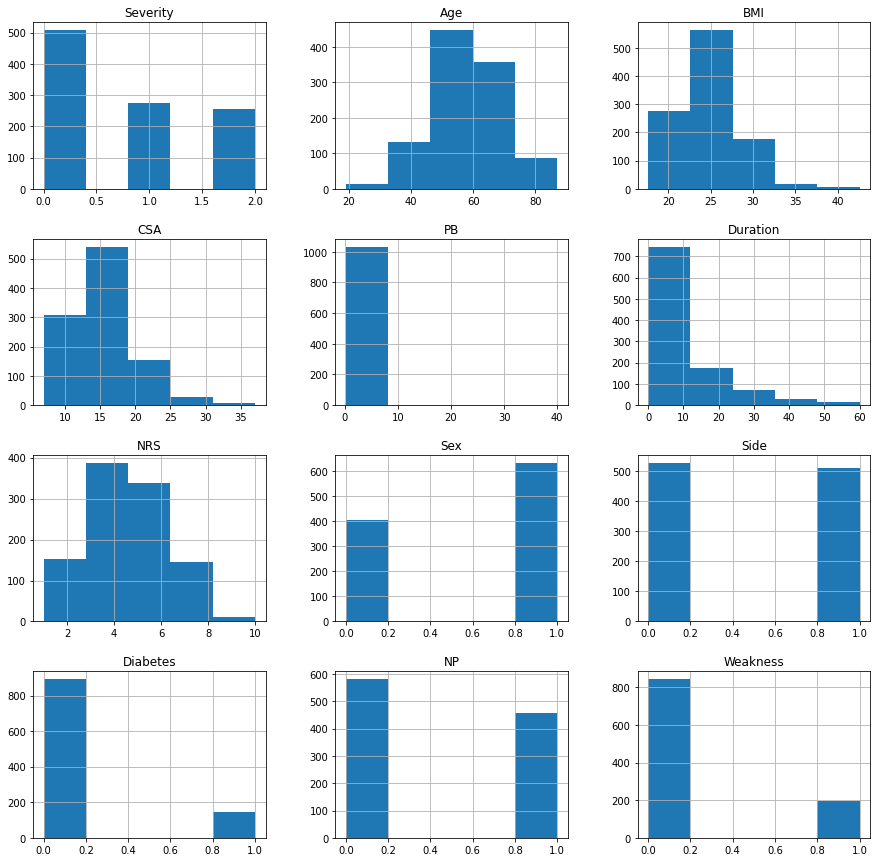

In [10]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

df.hist(ax=ax, bins=5);
fig.savefig('hist-std.png')

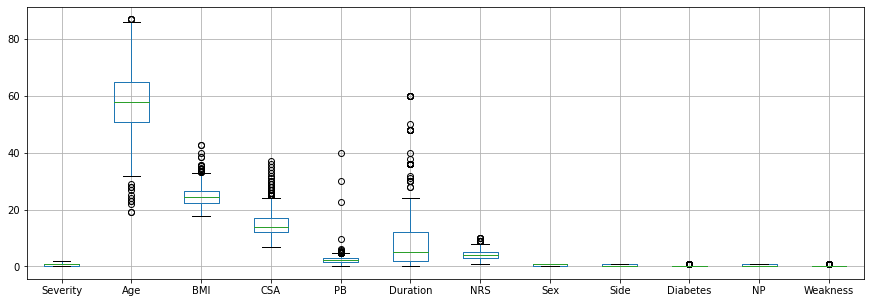

In [11]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df.boxplot(ax=ax);

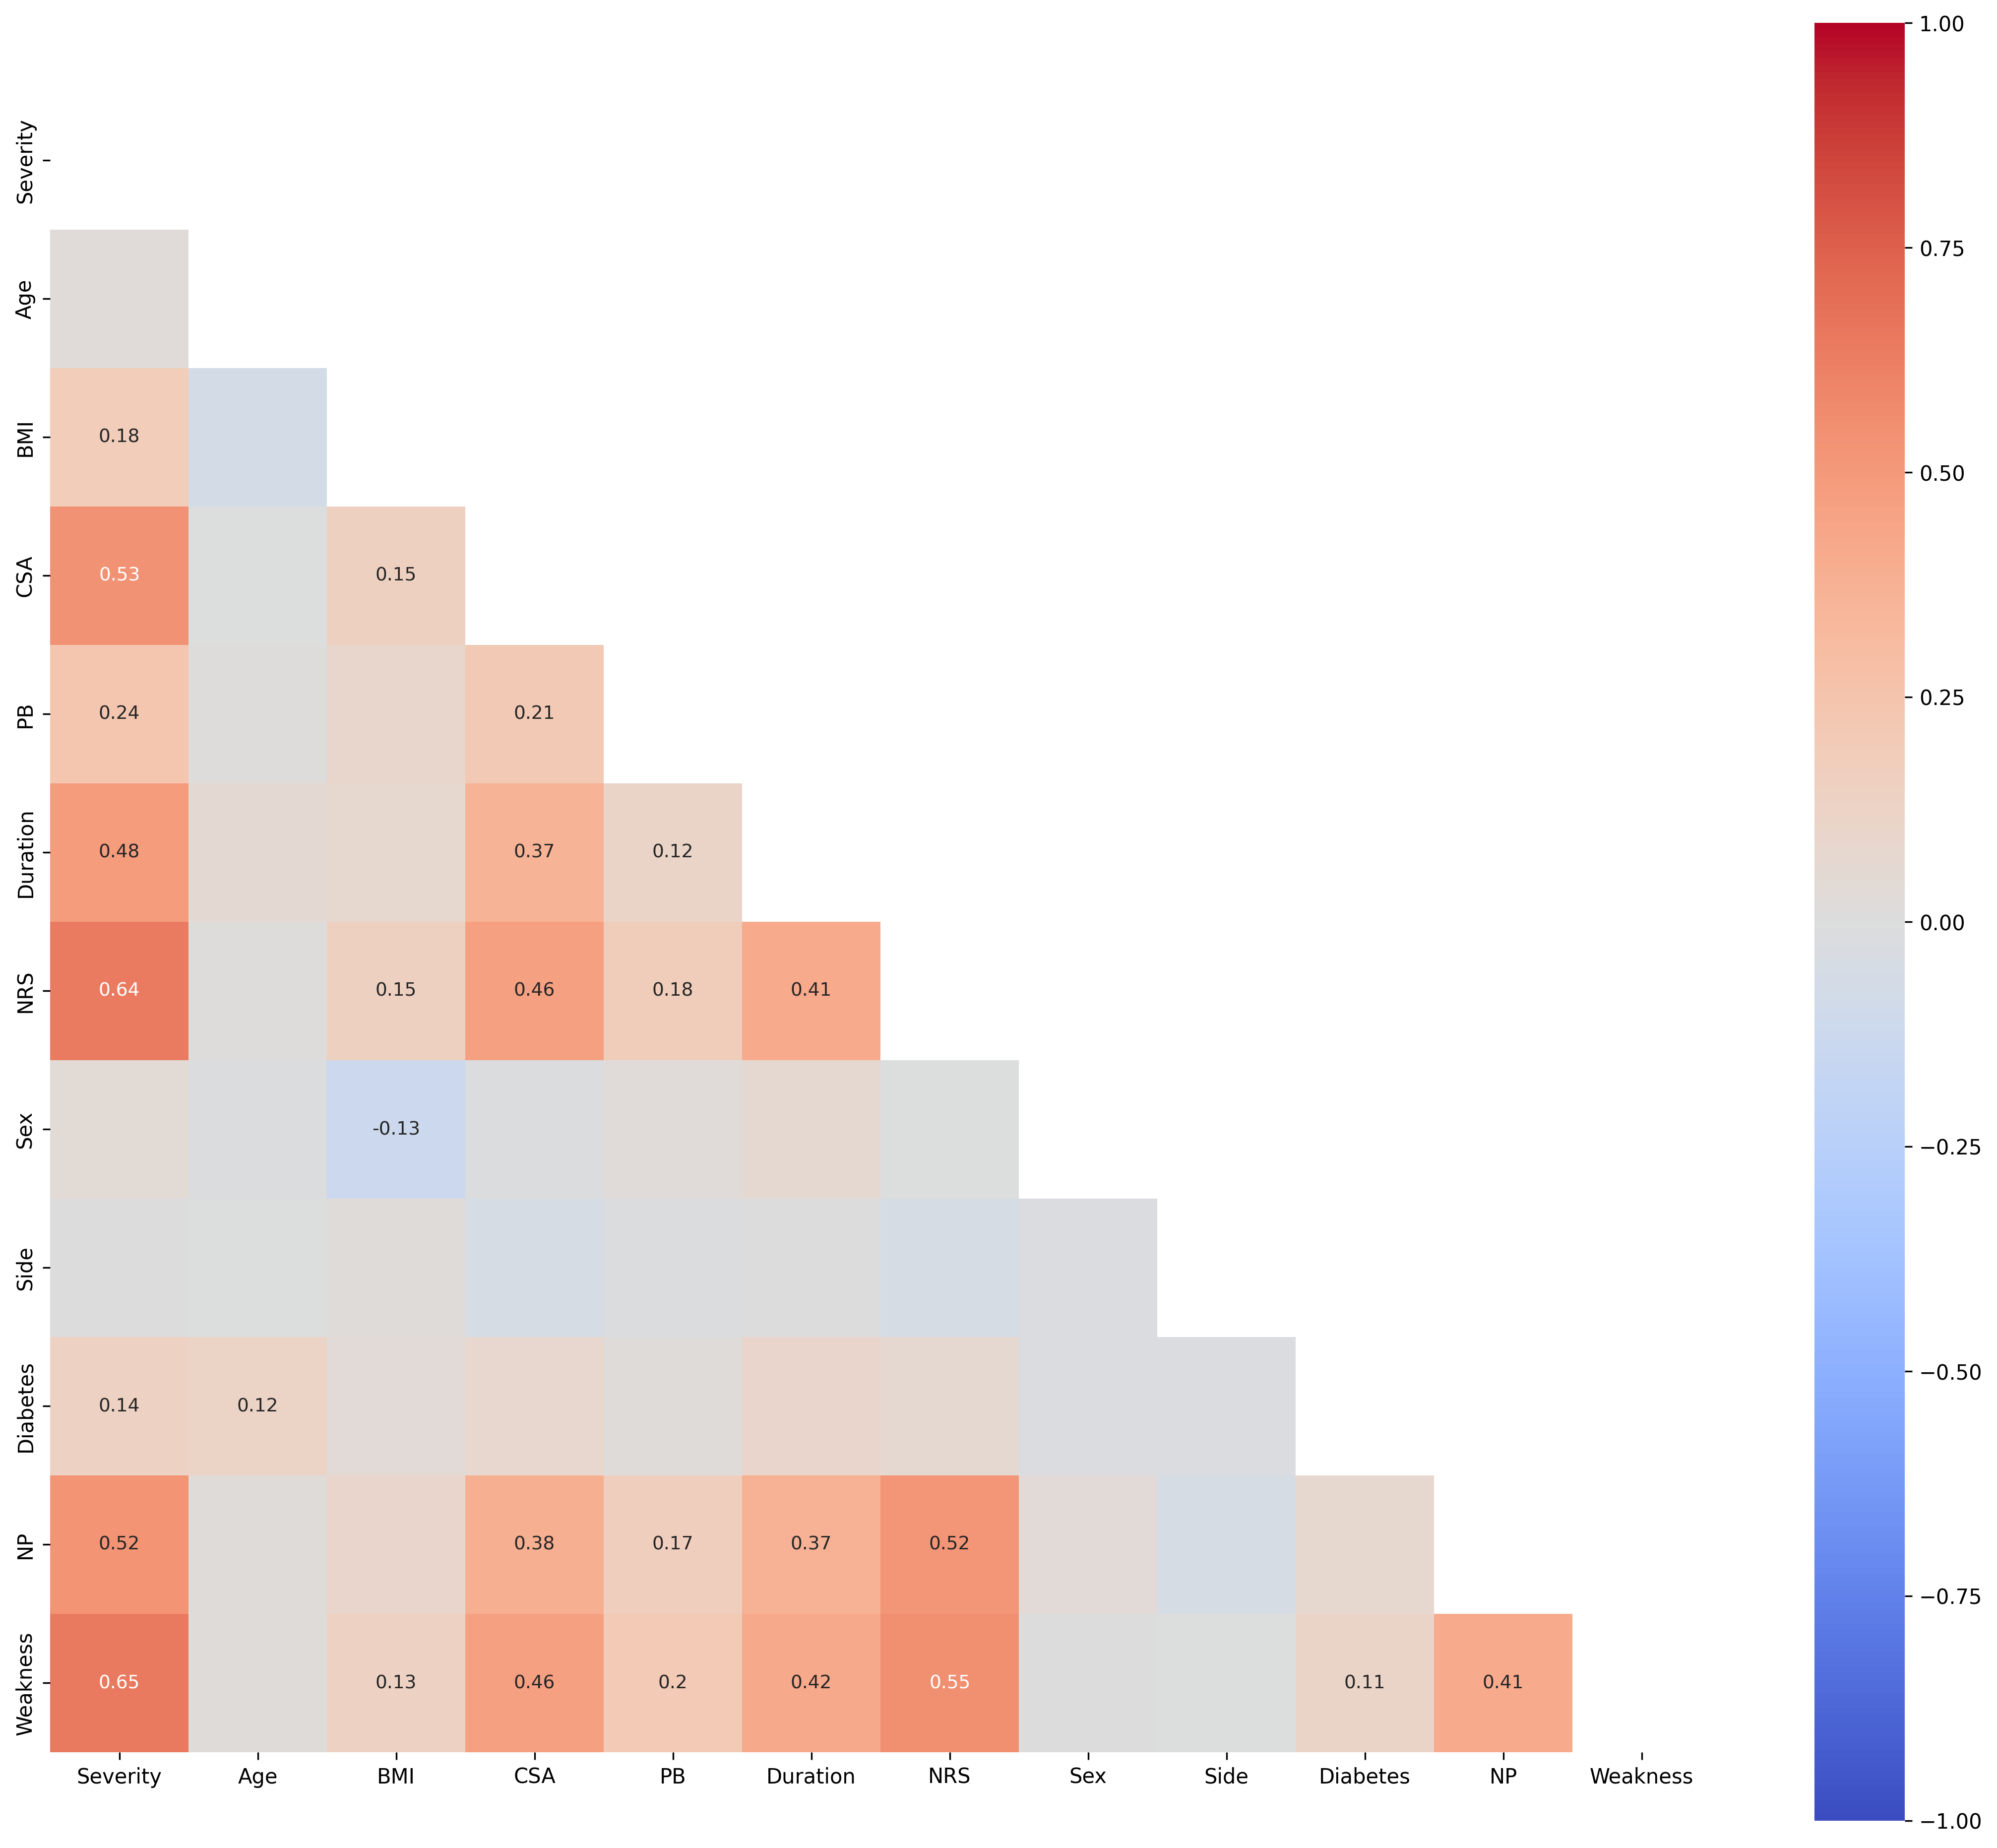

In [12]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize = (18,16))
ax = fig.gca()

corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, ax=ax, vmax=1, vmin=-1, center=0, square=True, mask=mask,
            cmap='coolwarm', annot=True, annot_kws = {"size": 9});

for t in ax.texts:
    if float(t.get_text())< -0.1 or float(t.get_text()) > 0.1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [13]:
df_copy = df
print(df_copy.isnull().sum())

Severity    0
Age         0
BMI         0
CSA         0
PB          0
Duration    0
NRS         0
Sex         0
Side        0
Diabetes    0
NP          0
Weakness    0
dtype: int64


# Usunięcie obserwacji odstających

In [14]:
# from scipy import stats

df_removed = df
# numerical_only = df_removed.loc[:, df_removed.columns != 'Severity']
# outliers = np.abs(stats.zscore(numerical_only)) < 3
# df_removed = df_removed[outliers.all(axis=1)]
# df_removed.reset_index(drop=True, inplace=True)

# df_removed

Usunięto 47 obserwacji odstających. Poniżej przedstawiono rozkłady, boxploty i macierz korelacji dla otrzymanych danych

C:\Users\Dodo\AppData\Local\Temp/ipykernel_5996/2498936444.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_removed.hist(ax=ax, bins=5);


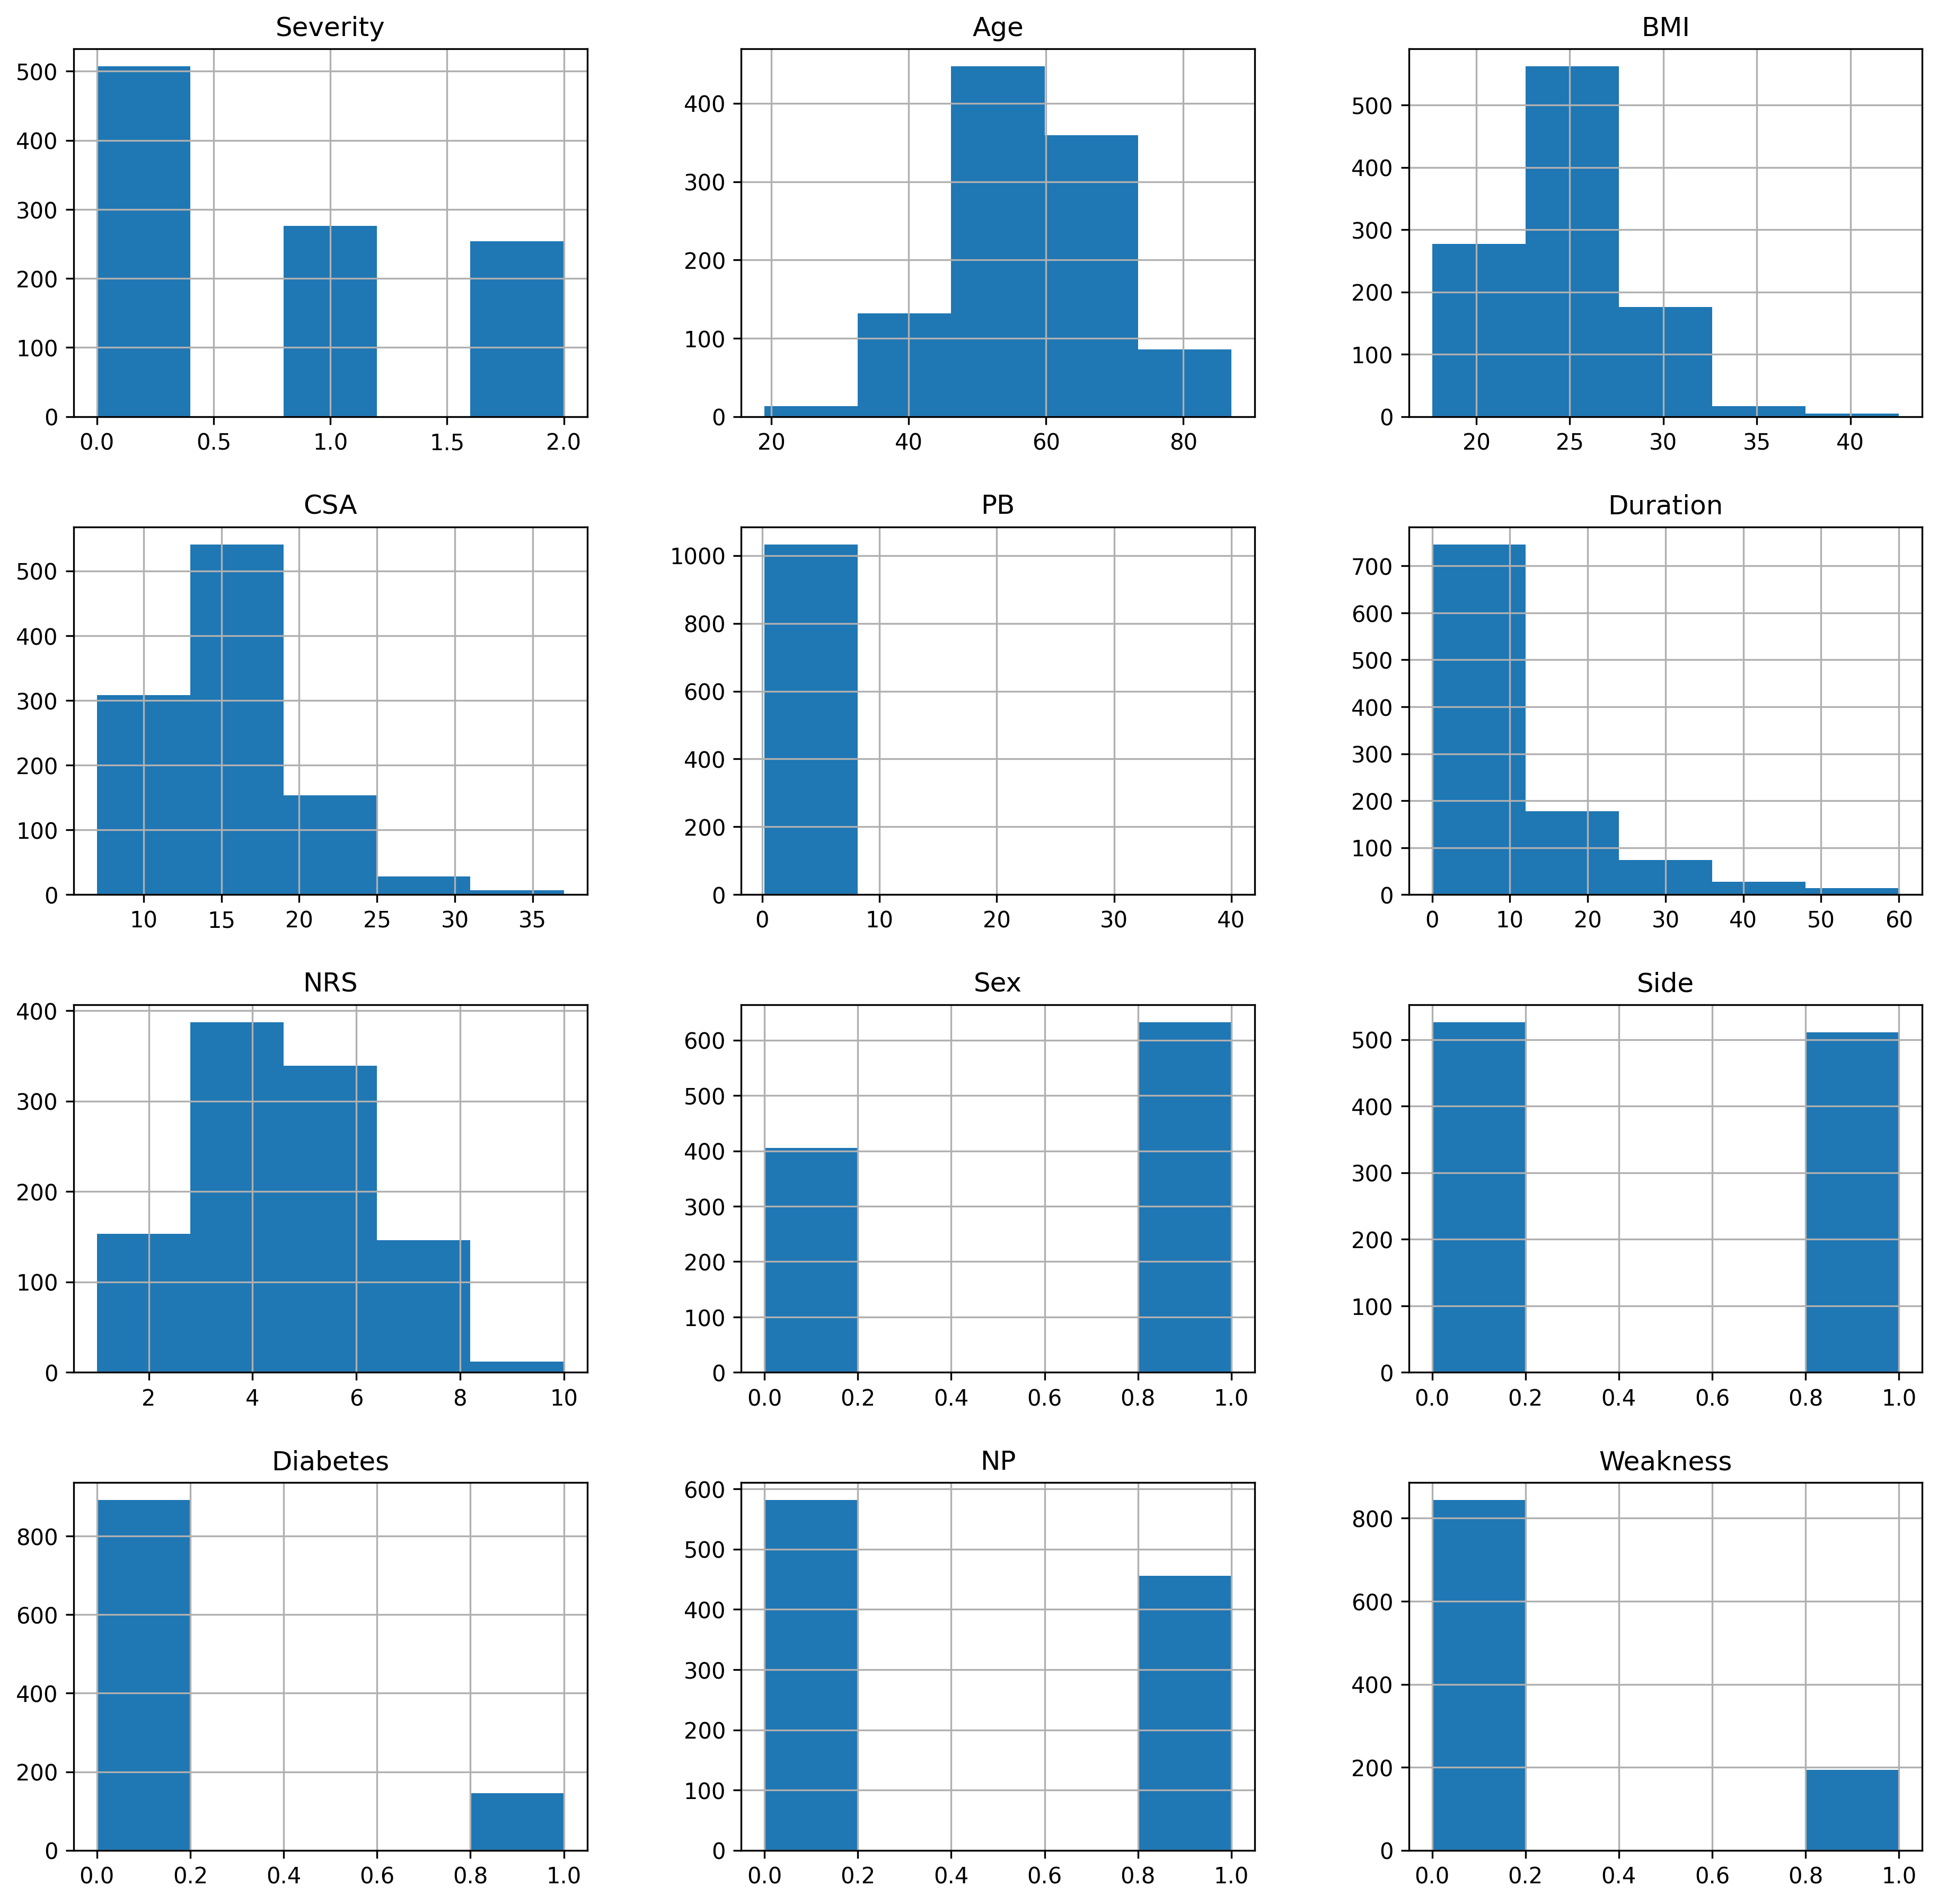

In [15]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

df_removed.hist(ax=ax, bins=5);

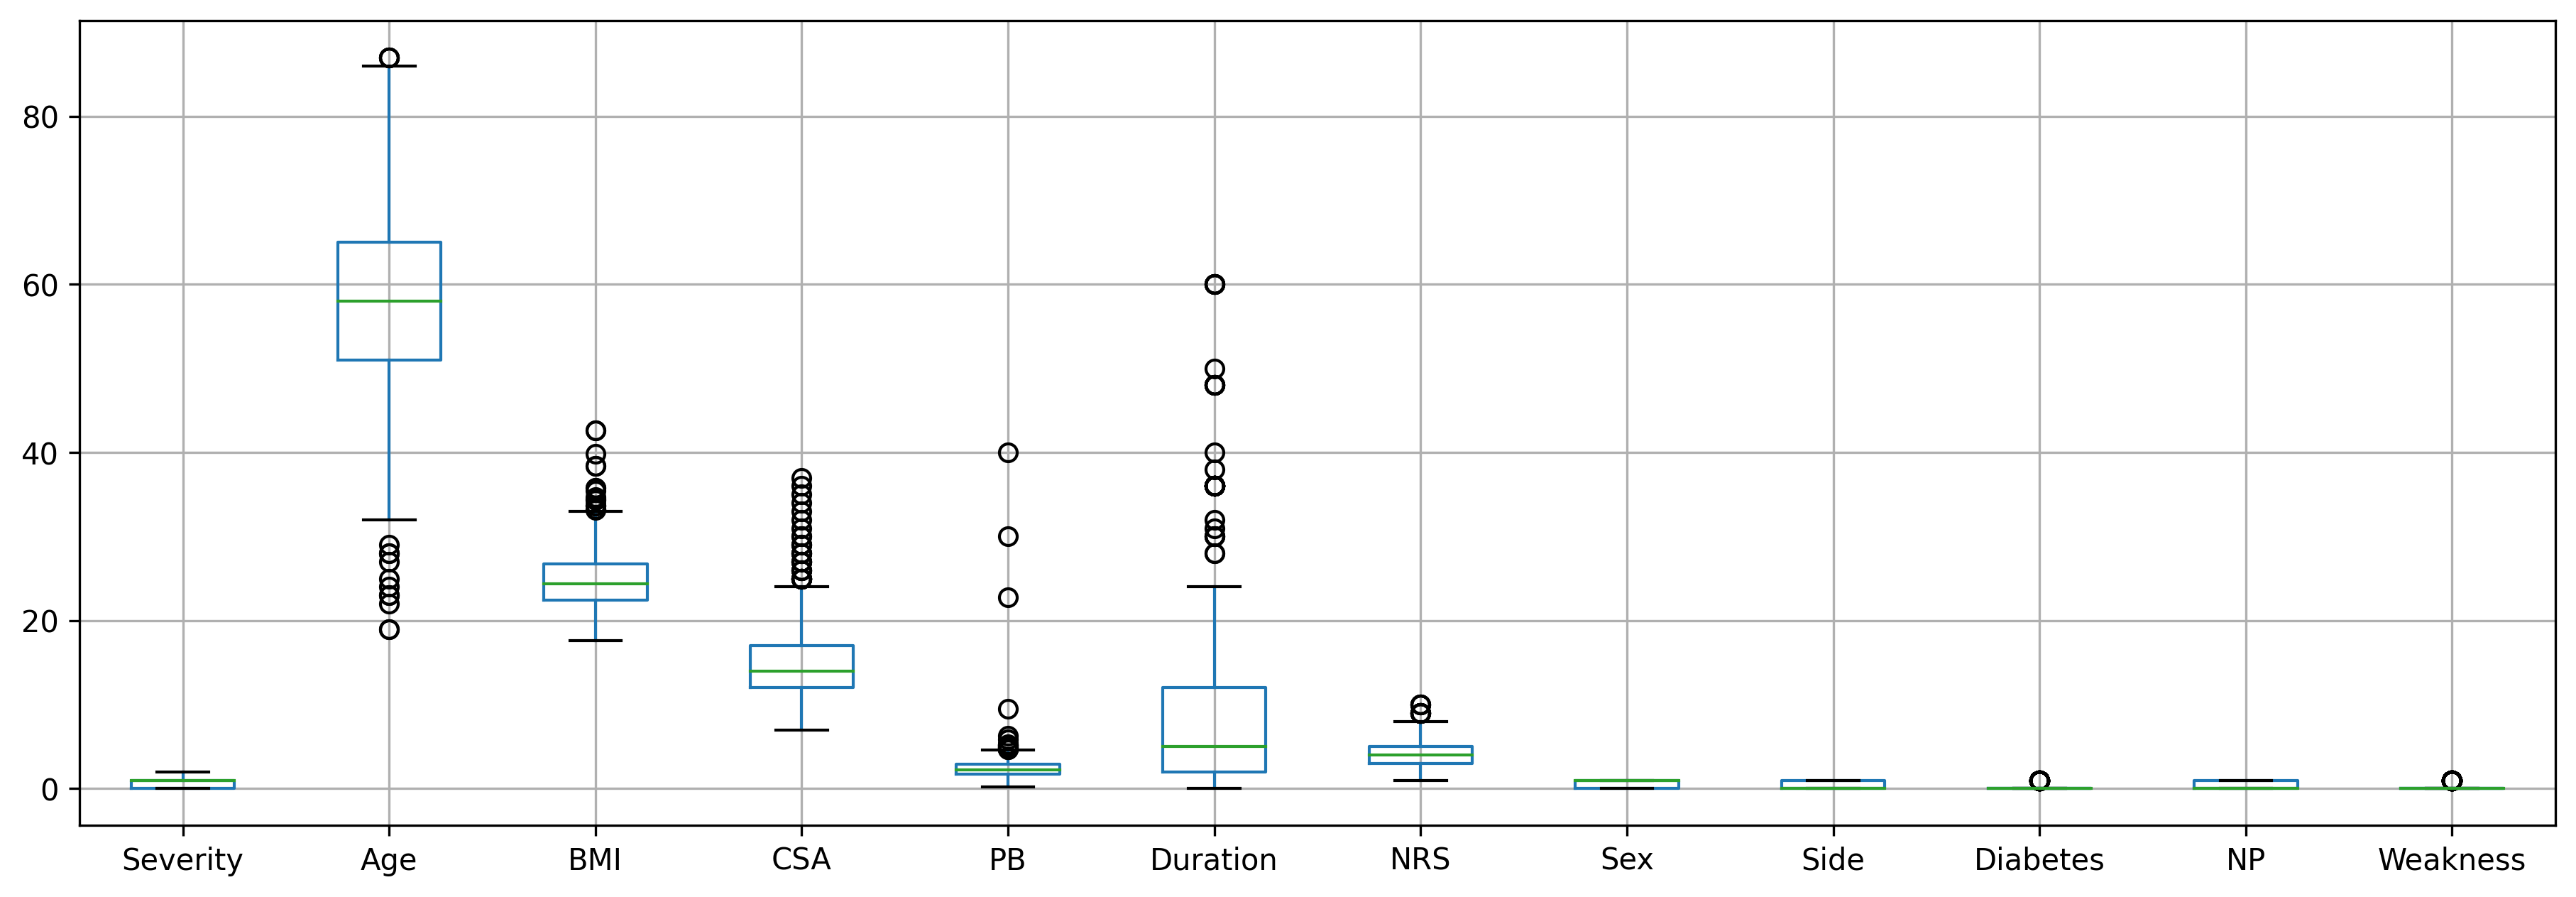

In [16]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df_removed.boxplot(ax=ax);

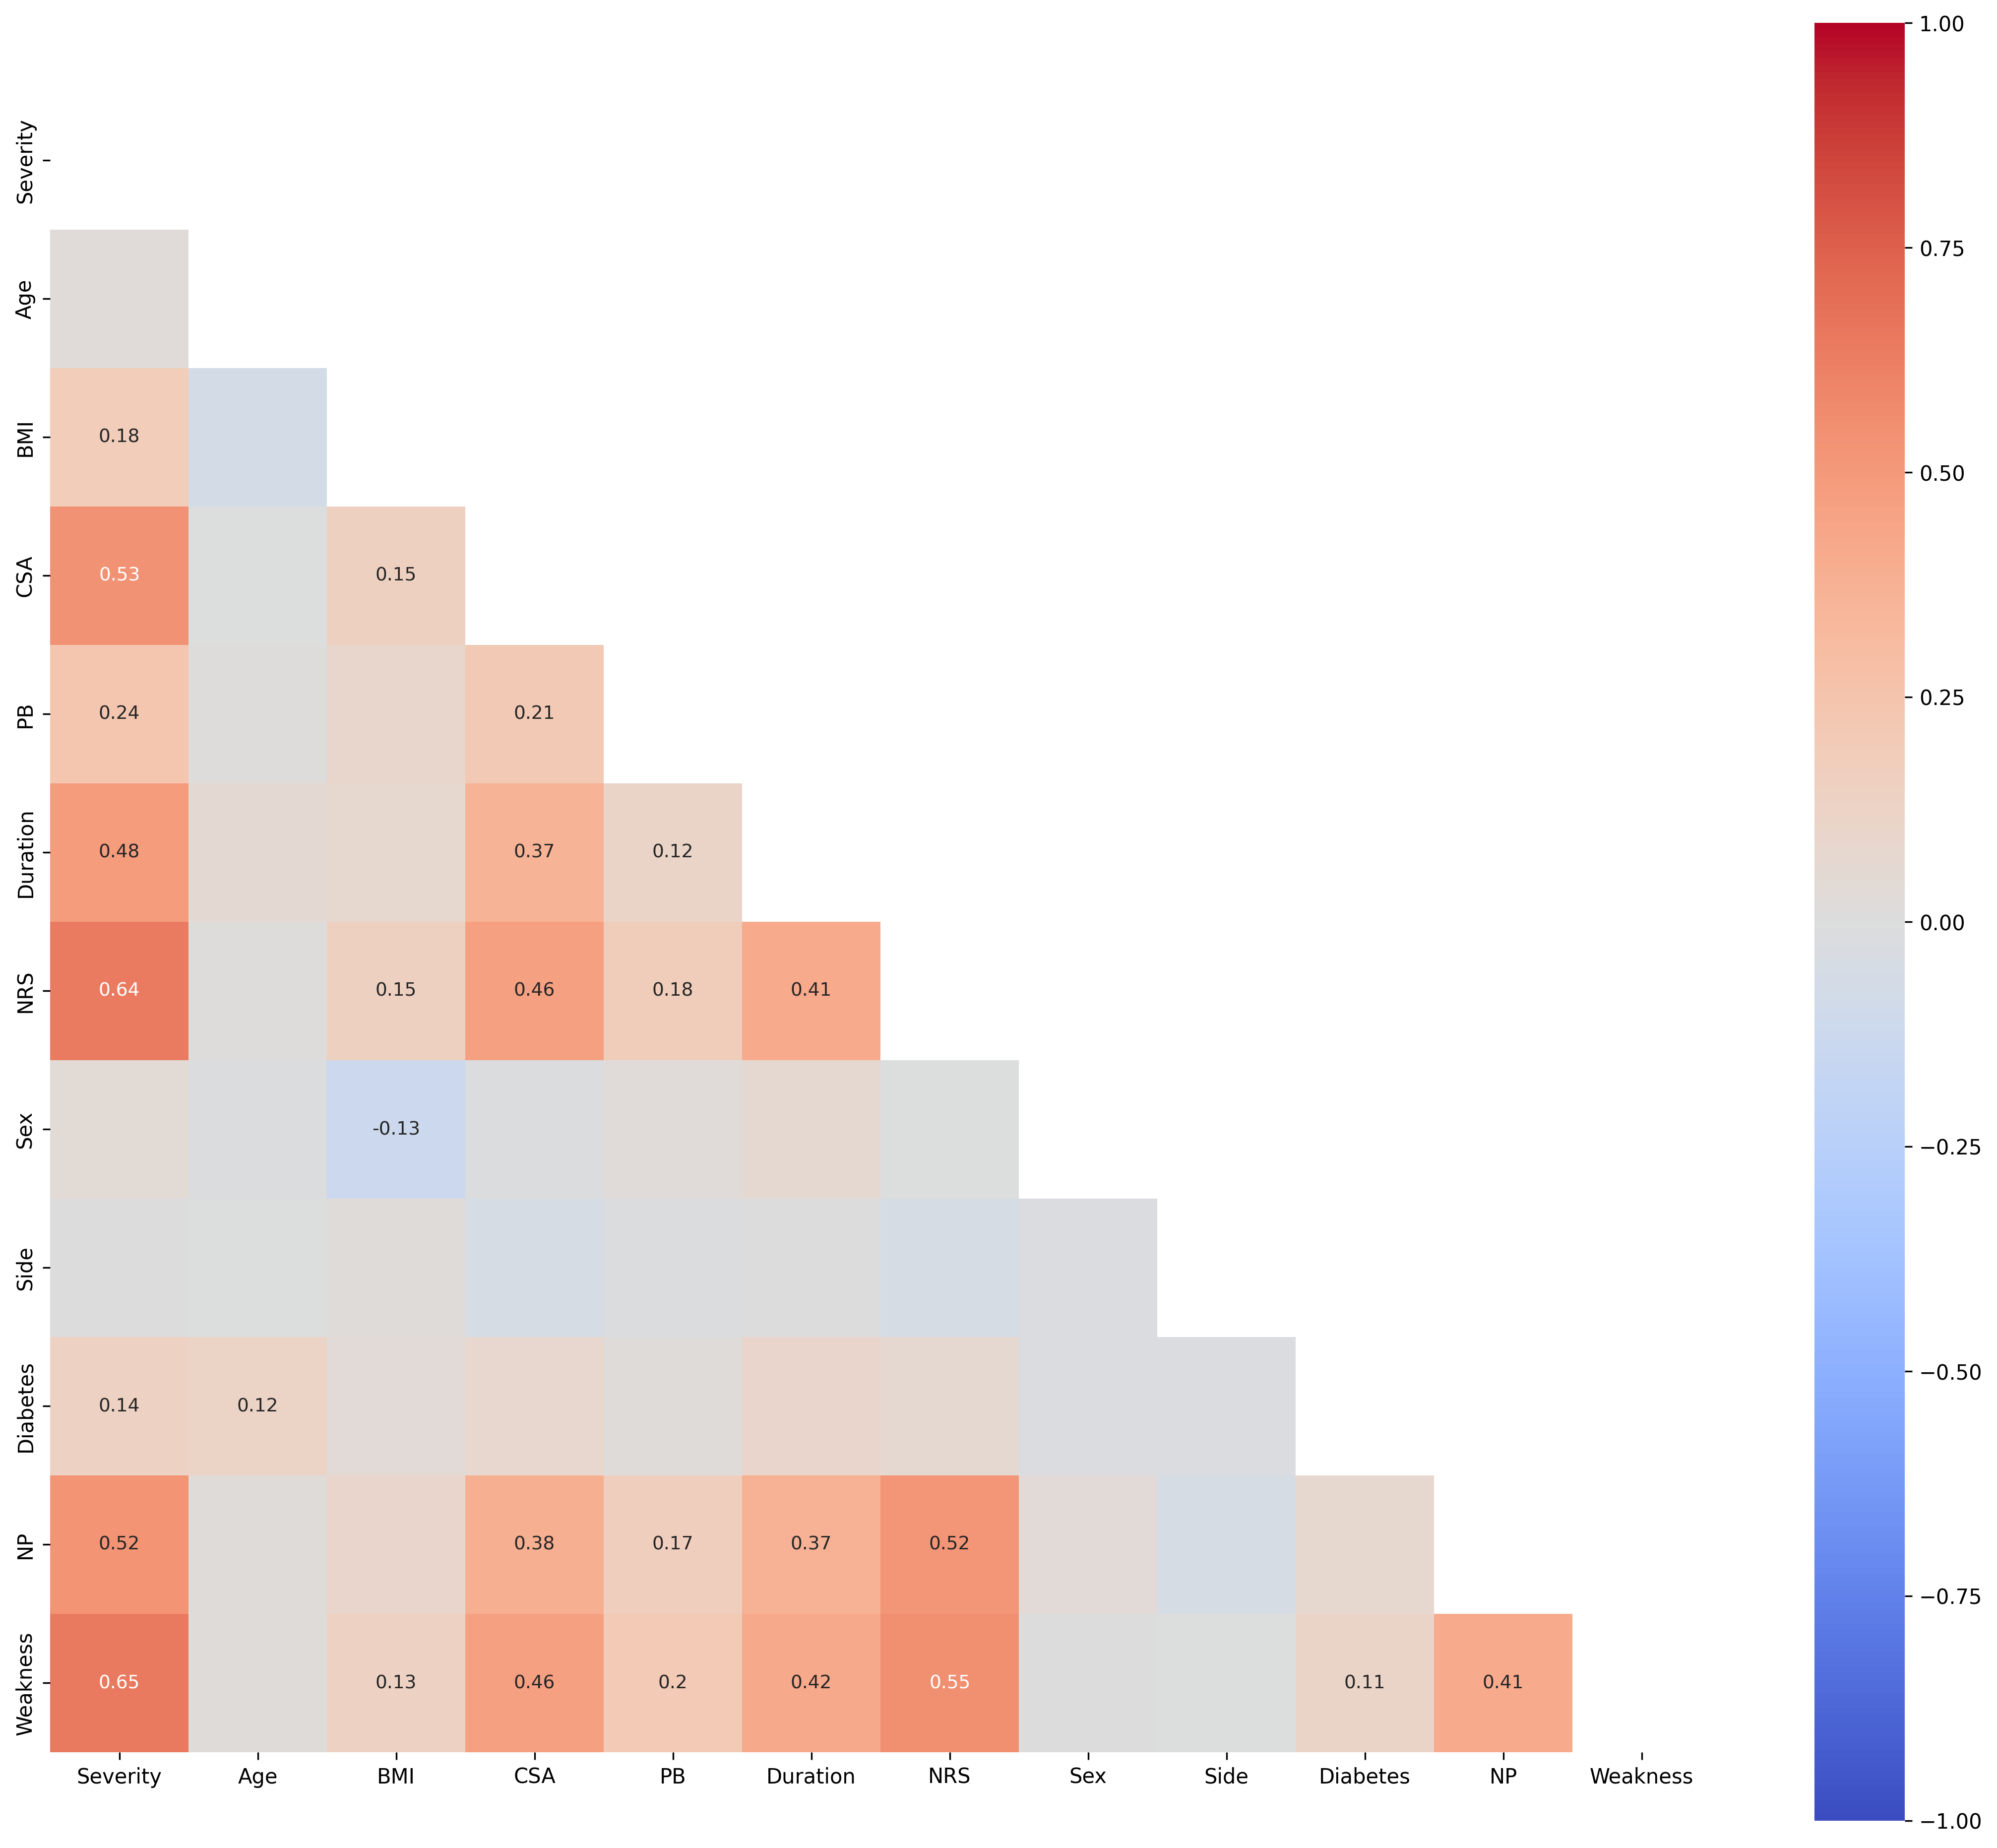

In [17]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize = (18,16))
ax = fig.gca()

corr = df_removed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, ax=ax, vmax=1, vmin=-1, center=0, square=True, mask=mask,
            cmap='coolwarm', annot=True, annot_kws = {"size": 9});

for t in ax.texts:
    if float(t.get_text())< -0.1 or float(t.get_text()) > 0.1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [18]:
df_adjusted

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,21.093750,10.0,1.9,3,2,1,1,0,0,0
1,2,68,20.415225,13.0,1.8,12,6,0,0,0,0,0
2,0,68,20.415225,13.0,1.5,12,3,0,1,0,0,0
3,0,63,28.507522,13.0,2.9,1,4,1,1,0,0,0
4,0,87,22.939751,12.0,2.0,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,22.189349,11.0,1.8,2,3,1,1,0,0,0
1033,2,49,24.196494,16.0,3.1,8,5,1,0,0,1,1
1034,0,41,23.808690,12.0,1.7,4,4,0,0,0,0,0
1035,0,67,26.986001,11.0,3.9,8,3,1,1,0,0,0


In [19]:
print(df['Age'].unique())
print(df['PB'].unique())
print(df['Duration'].unique())
print(df['NRS'].unique())
print('---------------------')
print(df['Side'].unique())
print(df['Diabetes'].unique())
print(df['NP'].unique())
print(df['Weakness'].unique())

[65 68 63 87 55 64 60 79 44 59 70 43 62 54 73 49 58 46 61 69 53 76 52 57
 50 72 74 71 67 45 38 77 33 82 22 66 75 48 56 51 81 41 86 78 40 36 47 83
 32 42 37 39 29 35 25 23 80 27 28 84 24 19]
[ 1.9   1.8   1.5   2.9   2.    2.3   4.5   3.4   2.7   3.3   1.2   2.4
  2.5   0.9   2.1   2.2   2.8   2.6   1.1   3.    3.8   3.2   4.    1.
  3.5   0.5   1.7   1.6   3.1   4.2   1.4   1.3   0.8   4.9   4.4  30.
  4.6   3.6   2.72  3.14 40.    4.89  2.61 22.8   4.8   5.2   5.1   3.9
  4.7   4.1   6.3   3.7   4.3   0.7   0.21  9.5   0.6   5.9   5.3 ]
[ 3 12  1  2  6  4  5  7 24  8  9 36 14 17 11 18 15 40 16 23 10 13  0 48
 60 22 31 28 38 30 20 32 50]
[ 2  6  3  4  5  1  7  8  9 10]
---------------------
[1 0]
[0 1]
[0 1]
[0 1]


## Standardyzacja

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_removed)

quality_vars_indexes = [0, 6, 7, 8, 9, 10, 11]
quality_vars_names = ['Severity', 'NRS', 'Sex', 'Side', 'Diabetes', 'NP', 'Weakness']

df_standardized = pd.DataFrame(scaler.transform(df_removed))
for i in range(len(quality_vars_indexes)):
    df_standardized[quality_vars_indexes[i]] = df_copy[quality_vars_names[i]]

df_standardized.rename(columns=col_mapper, inplace=True)

df_standardized

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,0.651714,-1.072510,-1.197444,-0.311441,-0.550318,2,1,1,0,0,0
1,2,0.929072,-1.271196,-0.500210,-0.366185,0.388643,6,0,0,0,0,0
2,0,0.929072,-1.271196,-0.500210,-0.530415,0.388643,3,0,1,0,0,0
3,0,0.466809,1.098399,-0.500210,0.235993,-0.758976,4,1,1,0,0,0
4,0,2.685670,-0.531962,-0.732621,-0.256698,-0.758976,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,0.189452,-0.751695,-0.965033,-0.366185,-0.654647,3,1,1,0,0,0
1033,2,-0.827526,-0.163961,0.197023,0.345480,-0.028673,5,1,0,0,1,1
1034,0,-1.567146,-0.277518,-0.732621,-0.420928,-0.445989,4,0,0,0,0,0
1035,0,0.836619,0.652866,-0.965033,0.783428,-0.028673,3,1,1,0,0,0


# Ekstrakcja cech

Minimum zmiennych dla wariancji > 95%: 3
Minimum zmiennych dla wariancji > 99%: 4
Minimum zmiennych dla wariancji > 99.9%: 4


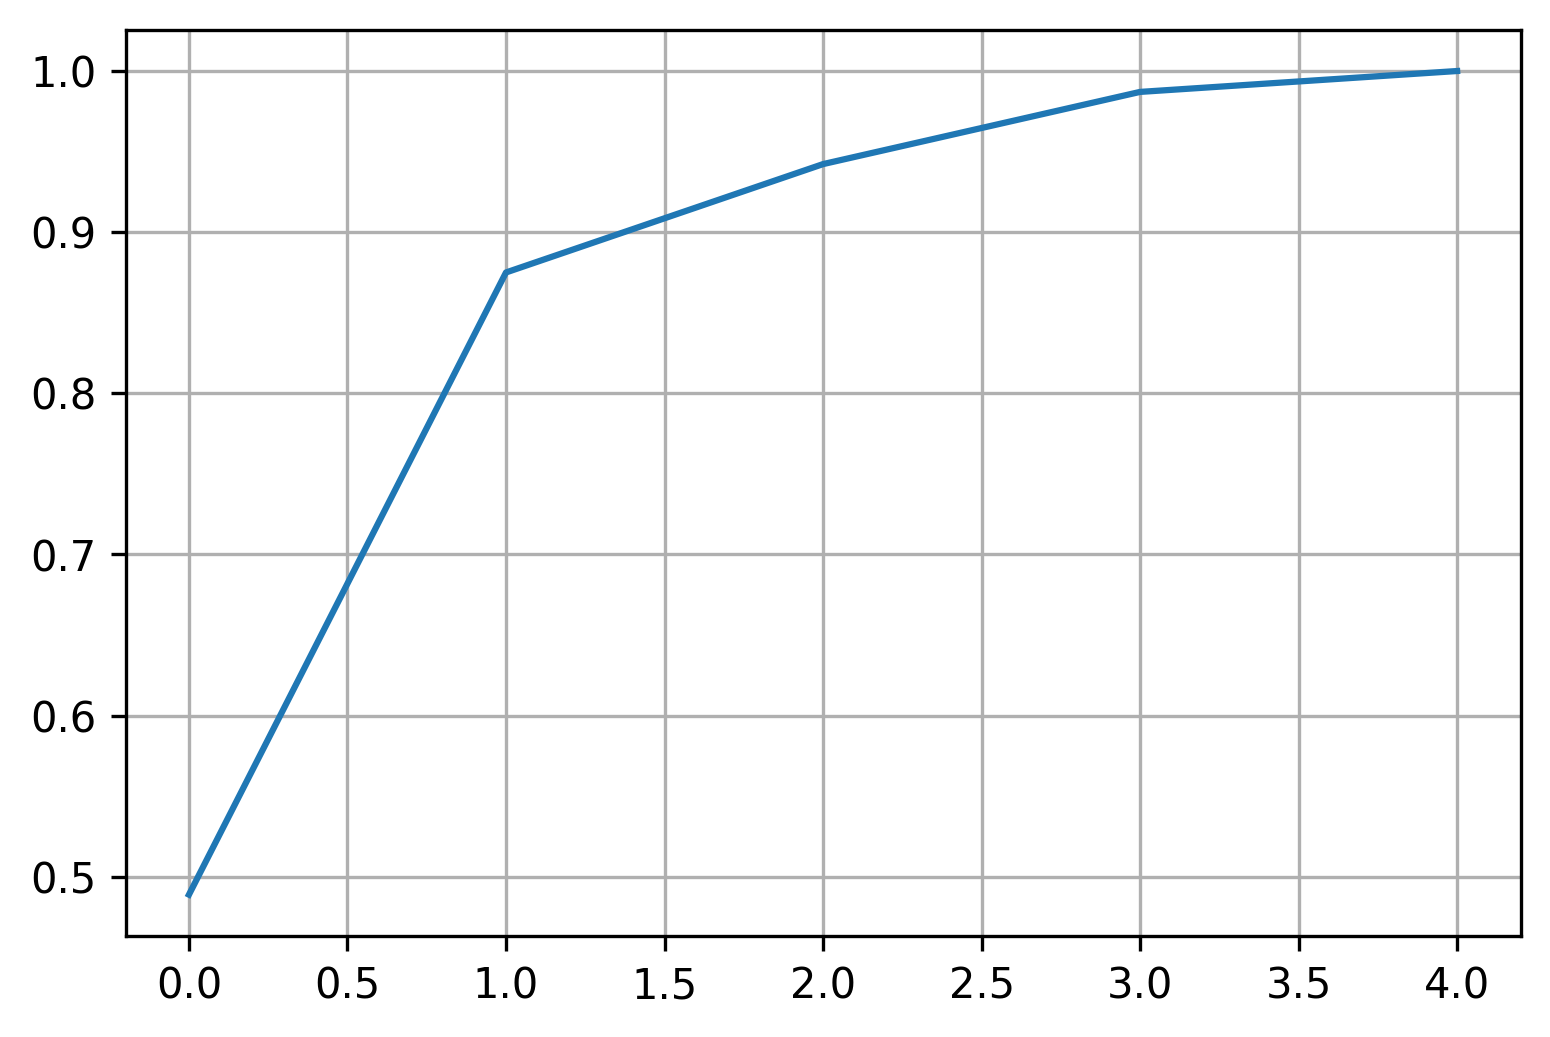

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(df_removed.iloc[:,1:6])

cev = pca.explained_variance_ratio_.cumsum()

plt.grid()
plt.plot(cev)
plt.savefig('variance.png')

print(f'Minimum zmiennych dla wariancji > 95%: {np.argmax(cev > 0.95)}')
print(f'Minimum zmiennych dla wariancji > 99%: {np.argmax(cev > 0.99)}')
print(f'Minimum zmiennych dla wariancji > 99.9%: {np.argmax(cev > 0.999)}')

In [22]:
pca2 = PCA(n_components=4)

df_reduced = pd.DataFrame(pca2.fit_transform(df_removed.iloc[:,0:11]))
df_reduced = df_reduced.join(df_standardized['NRS'])
df_reduced = df_reduced.join(df_standardized['Sex'])
df_reduced = df_reduced.join(df_standardized['Side'])
df_reduced = df_reduced.join(df_standardized['Diabetes'])
df_reduced = df_reduced.join(df_standardized['NP'])
df_reduced = df_reduced.join(df_standardized['Weakness'])
df_reduced = df_reduced.join(df_standardized['Severity'])

df_reduced

,0,1,2,3,NRS,Sex,Side,Diabetes,NP,Weakness,Severity
0,-5.347156,-8.126492,-5.075822,-1.694237,2,1,1,0,0,0,0
1,-10.672576,0.588534,-3.676703,-3.019831,6,0,0,0,0,0,2
2,-10.591772,0.245347,-4.360149,-2.968246,3,0,1,0,0,0,0
3,-2.952554,-8.432422,0.892403,4.113887,4,1,1,0,0,0,0
4,-26.209848,-14.981759,-1.778205,-0.250675,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1032,-0.297217,-7.512667,-3.551025,-1.158835,3,1,1,0,0,0,0
1033,8.662963,2.225581,0.721682,-1.037305,5,1,0,0,1,1,2
1034,17.587751,-0.589560,-2.768376,-0.311974,4,0,0,0,0,0,0
1035,-8.476801,-3.329811,-2.885255,3.708300,3,1,1,0,0,0,0


## Trening klasyfikatorów

### K-Neighbours Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
    
def getAccuracy(result, actual_classification):
    c = 0
    i = 0
    for el in actual_classification:
        if result[i] == el:
            c += 1
            i += 1
            
    acc = c / len(result)
    return acc
    
def optimizeNoNeighbours(limit, X_train, X_test, y_train, y_test):
    best_acc = 0
    no_neighbours = 0
    for i in range(2, limit):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train, y_train)
        result = neigh.predict(X_test)
        acc = getAccuracy(result, y_test)
        if acc > best_acc:
            best_acc = acc
            no_neighbours = i
            
    return no_neighbours

classificationAcurracy = {}
classificationFscore = {}
classificationCrossVal = {}

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], test_size=0.2)

neighbours = optimizeNoNeighbours(25, X_train, X_test, y_train, y_test)

neigh = KNeighborsClassifier(n_neighbors=neighbours)
neigh.fit(X_train, y_train)

result = neigh.predict(X_test)

print("Acurracy for train data: " + str(neigh.score(X_train, y_train)))

print("Best result got for " + str(neighbours) + " neighbours with accuracy: " + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(neigh, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['knn'] = accuracy_score(result, y_test)
classificationFscore['knn'] = f1_score(y_test, result, average='macro')
classificationCrossVal['knn'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Acurracy for train data: 0.7310012062726177
Best result got for 15 neighbours with accuracy: 0.6105769230769231
Precision: 0.5649717514124294
Recall: 0.5445543159792653
F1 score = 0.550186487486832
Confusion matrix: 
[[82 14  6]
 [24 15  9]
 [12 16 30]]
Cross Validaton:  0.6384290226681532


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Decision tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

result = dt.predict(X_test)

print('Accuracy tested on train data: ' + str(dt.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')

f1 = 2 * (precision * recall) / (precision / recall)
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(dt, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['dt'] = accuracy_score(result, y_test)
classificationFscore['dt'] = f1_score(y_test, result, average='macro')
classificationCrossVal['dt'] = scores.mean()

Accuracy tested on train data: 1.0
Accuracy tested on test data: 0.6298076923076923
Precision: 0.601720175249587
Recall: 0.5896861618210503
F1 score = 0.5945122545760759
Confusion matrix: 
[[75 20  7]
 [22 19  7]
 [ 8 13 37]]
Cross Validaton:  0.626862690449647


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

### SVC with linear kernel

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_linear = SVC(kernel="linear", C=0.025)
svc_linear.fit(X_train, y_train)

result = svc_linear.predict(X_test)

print('Accuracy tested on train data: ' + str(svc_linear.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['svc_linear'] = accuracy_score(result, y_test)
classificationFscore['svc_linear'] = f1_score(y_test, result, average='macro')
classificationCrossVal['svc_linear'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy tested on train data: 0.7358262967430639
Accuracy tested on test data: 0.7067307692307693
Precision: 0.6718993253762324
Recall: 0.6420582600856435
F1 score = 0.6515793482085618
Confusion matrix: 
[[90 11  1]
 [25 17  6]
 [ 5 13 40]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.7069072835377183


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### SVC with poly kernel

In [27]:
from sklearn.svm import SVC

svc_linear = SVC(kernel="poly", C=5.025)
svc_linear.fit(X_train, y_train)

result = svc_linear.predict(X_test)

print('Accuracy tested on train data: ' + str(svc_linear.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['svc_poly'] = accuracy_score(result, y_test)
classificationFscore['svc_poly'] = f1_score(y_test, result, average='macro')
classificationCrossVal['svc_poly'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Accuracy tested on train data: 0.7273823884197829
Accuracy tested on test data: 0.6490384615384616
Precision: 0.6196048254774787
Recall: 0.5609505296371422
F1 score = 0.5695443855011059
Confusion matrix: 
[[92  9  1]
 [32 11  5]
 [15 11 32]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.6528846153846155


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### SVC with rfb kernel

In [28]:
from sklearn.svm import SVC

svc_linear = SVC(kernel="rbf", C=2.025)
svc_linear.fit(X_train, y_train)

result = svc_linear.predict(X_test)

print('Accuracy tested on train data: ' + str(svc_linear.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['svc_rbf'] = accuracy_score(result, y_test)
classificationFscore['svc_rbf'] = f1_score(y_test, result, average='macro')
classificationCrossVal['svc_rbf'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy tested on train data: 0.752714113389626
Accuracy tested on test data: 0.6586538461538461
Precision: 0.6129198966408268
Recall: 0.5883479828713094
F1 score = 0.5950726144900903
Confusion matrix: 
[[88 11  3]
 [23 16  9]
 [ 9 16 33]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.6799284652545523


### SVC with sigmoid kernel

In [29]:
from sklearn.svm import SVC

svc_linear = SVC(kernel="sigmoid", C=22.025)
svc_linear.fit(X_train, y_train)

result = svc_linear.predict(X_test)

print('Accuracy tested on train data: ' + str(svc_linear.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['svc_sigmoid'] = accuracy_score(result, y_test)
classificationFscore['svc_sigmoid'] = f1_score(y_test, result, average='macro')
classificationCrossVal['svc_sigmoid'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy tested on train data: 0.5464414957780458
Accuracy tested on test data: 0.5480769230769231
Precision: 0.520387946186048
Recall: 0.5155792201938246
F1 score = 0.5154963324912467
Confusion matrix: 
[[65 22 15]
 [19 18 11]
 [ 6 21 31]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.5573253437383873


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, max_depth=3)
rf.fit(X_train, y_train)

result = rf.predict(X_test)

print('Accuracy tested on train data: ' + str(rf.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['rf'] = accuracy_score(result, y_test)
classificationFscore['rf'] = f1_score(y_test, result, average='macro')
classificationCrossVal['rf'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Accuracy tested on train data: 0.7370325693606755
Accuracy tested on test data: 0.7211538461538461
Precision: 0.7204534524218481
Recall: 0.6346771467207573
F1 score = 0.6491072866550073
Confusion matrix: 
[[98  4  0]
 [33 13  2]
 [11  8 39]]
Cross Validaton:  0.5573253437383873


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

result = lr.predict(X_test)

print('Accuracy tested on train data: ' + str(lr.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['lr'] = accuracy_score(result, y_test)
classificationFscore['lr'] = f1_score(y_test, result, average='macro')
classificationCrossVal['lr'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy tested on train data: 0.752714113389626
Accuracy tested on test data: 0.7307692307692307
Precision: 0.6991000383472342
Recall: 0.6658355871084066
F1 score = 0.6760327211182849
Confusion matrix: 
[[92  9  1]
 [27 17  4]
 [ 3 12 43]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.5573253437383873


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Uczenie zespołowe

In [32]:
from sklearn.ensemble import VotingClassifier

vc_hard = VotingClassifier(estimators=[
                ('svc_linear', svc_linear),
                ('dt', dt),
                ('neigh', neigh)
            ], voting='hard')

vc_hard.fit(X_train, y_train)

result = vc_hard.predict(X_test)

print('Accuracy tested on train data: ' + str(vc_hard.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(vc_hard, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['voting1'] = accuracy_score(result, y_test)
classificationFscore['voting1'] = f1_score(y_test, result, average='macro')
classificationCrossVal['voting1'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Accuracy tested on train data: 0.8359469240048251
Accuracy tested on test data: 0.6394230769230769
Precision: 0.59038737446198
Recall: 0.5716841334234842
F1 score = 0.5747634320379901
Confusion matrix: 
[[84 11  7]
 [27 13  8]
 [12 10 36]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.6364687848383501


In [33]:
vc_hard = VotingClassifier(estimators=[
                ('svc_linear', svc_linear),
                ('dt', dt),
                ('rf', rf)
            ], voting='hard')

vc_hard.fit(X_train, y_train)

result = vc_hard.predict(X_test)

print('Accuracy tested on train data: ' + str(vc_hard.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(vc_hard, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['voting2'] = accuracy_score(result, y_test)
classificationFscore['voting2'] = f1_score(y_test, result, average='macro')
classificationCrossVal['voting2'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Accuracy tested on train data: 0.827503015681544
Accuracy tested on test data: 0.6923076923076923
Precision: 0.6672979797979798
Recall: 0.6187457741717376
F1 score = 0.6273492956710435
Confusion matrix: 
[[91  6  5]
 [30 14  4]
 [11  8 39]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.6751161278335192


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
     ('rf', rf),
    ('svc', svc_linear),
    ('dt', dt)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train)

result = clf.predict(X_test)

print('Accuracy tested on train data: ' + str(clf.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(clf, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['stacking1'] = accuracy_score(result, y_test)
classificationFscore['stacking1'] = f1_score(y_test, result, average='macro')
classificationCrossVal['stacking1'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Accuracy tested on train data: 0.8202653799758746
Accuracy tested on test data: 0.6826923076923077
Precision: 0.6478678620778303
Recall: 0.6170836150552175
F1 score = 0.6265191535761395
Confusion matrix: 
[[88 11  3]
 [27 16  5]
 [ 6 14 38]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.6963396506874767


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

In [40]:
estimators2 = [
     ('rf', rf),
    ('dt', dt),
    ('neigh', neigh)
]
clf = StackingClassifier(
    estimators=estimators2, final_estimator=SVC()
)

clf.fit(X_train, y_train)

result = clf.predict(X_test)

print('Accuracy tested on train data: ' + str(clf.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(clf, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['stacking2'] = accuracy_score(result, y_test)
classificationFscore['stacking2'] = f1_score(y_test, result, average='macro')
classificationCrossVal['stacking2'] = scores.mean()

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Accuracy tested on train data: 0.8443908323281062
Accuracy tested on test data: 0.7211538461538461
Precision: 0.710749601275917
Recall: 0.6739210051836827
F1 score = 0.6864190120492641
Confusion matrix: 
[[87 14  1]
 [22 23  3]
 [ 5 13 40]]


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

Cross Validaton:  0.7136937941285768


c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

In [41]:
classificationAcurracy
sorted(((v, k) for k, v in classificationAcurracy.items()), reverse=True)

[(0.7307692307692307, 'lr'),
 (0.7211538461538461, 'stacking2'),
 (0.7211538461538461, 'rf'),
 (0.7067307692307693, 'svc_linear'),
 (0.6923076923076923, 'voting2'),
 (0.6826923076923077, 'stacking1'),
 (0.6586538461538461, 'svc_rbf'),
 (0.6490384615384616, 'svc_poly'),
 (0.6394230769230769, 'voting1'),
 (0.6298076923076923, 'dt'),
 (0.6105769230769231, 'knn'),
 (0.5480769230769231, 'svc_sigmoid')]

In [42]:
classificationFscore
sorted(((v, k) for k, v in classificationFscore.items()), reverse=True)

[(0.6864190120492641, 'stacking2'),
 (0.6760327211182849, 'lr'),
 (0.6515793482085618, 'svc_linear'),
 (0.6491072866550073, 'rf'),
 (0.6273492956710435, 'voting2'),
 (0.6265191535761395, 'stacking1'),
 (0.5950726144900903, 'svc_rbf'),
 (0.5945122545760759, 'dt'),
 (0.5747634320379901, 'voting1'),
 (0.5695443855011059, 'svc_poly'),
 (0.550186487486832, 'knn'),
 (0.5154963324912467, 'svc_sigmoid')]

In [43]:
classificationCrossVal
sorted(((v, k) for k, v in classificationCrossVal.items()), reverse=True)

[(0.7136937941285768, 'stacking2'),
 (0.7069072835377183, 'svc_linear'),
 (0.6963396506874767, 'stacking1'),
 (0.6799284652545523, 'svc_rbf'),
 (0.6751161278335192, 'voting2'),
 (0.6528846153846155, 'svc_poly'),
 (0.6384290226681532, 'knn'),
 (0.6364687848383501, 'voting1'),
 (0.626862690449647, 'dt'),
 (0.5573253437383873, 'svc_sigmoid'),
 (0.5573253437383873, 'rf'),
 (0.5573253437383873, 'lr')]

In [39]:
# TODO
# Optimizing classifiers
#
# Grid Search
# Genetic Hiperparameters Optimization
#